# Introduction
Using **SQLite3** for data analysis of SF_salary dataset.

In [3]:
# Importing required packages 
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Making sns as default for plots 

# Importing dataset into colab
from google.colab import files 
uploaded = files.upload() # Here I need you to upload the database.sqlite file

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving database.sqlite to database.sqlite


# Creating a database connection 
* Get table names
* Get database structure
* Get first 5 rows


In [4]:
con = sqlite3.connect('/content/database.sqlite') 
table_name = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con)
print(table_name)
structure = pd.read_sql_query("pragma table_info(Salaries);", con)
print(structure)
data = pd.read_sql_query("Select * from salaries limit 5;", con)
data

       name
0  Salaries
    cid              name     type  notnull dflt_value  pk
0     0                Id  INTEGER        0       None   1
1     1      EmployeeName     TEXT        0       None   0
2     2          JobTitle     TEXT        0       None   0
3     3           BasePay  NUMERIC        0       None   0
4     4       OvertimePay  NUMERIC        0       None   0
5     5          OtherPay  NUMERIC        0       None   0
6     6          Benefits  NUMERIC        0       None   0
7     7          TotalPay  NUMERIC        0       None   0
8     8  TotalPayBenefits  NUMERIC        0       None   0
9     9              Year  INTEGER        0       None   0
10   10             Notes     TEXT        0       None   0
11   11            Agency     TEXT        0       None   0
12   12            Status     TEXT        0       None   0


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,


## First 5 rows of EmployeeName

In [5]:
p = pd.read_sql_query("SELECT EmployeeName from salaries limit 5;", con)
p

,EmployeeName
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER


## Name of the top 5 employees with the highest totalpay

In [6]:
p = pd.read_sql_query("SELECT Id, EmployeeName, TotalPay from salaries order by TotalPay DESC limit 5;", con)
p

,Id,EmployeeName,TotalPay
0,1,NATHANIEL FORD,567595.43
1,2,GARY JIMENEZ,538909.28
2,110532,David Shinn,471952.64
3,110533,Amy P Hart,390111.98
4,36160,Gary Altenberg,362844.66


## Average basepay round off to 2 decimal places

In [7]:
p = pd.read_sql_query("SELECT round(avg(BasePay),2) from salaries;", con)
p

,"round(avg(BasePay),2)"
0,66053.73


## Name of employees with more than $20000 overtimepay in the year 2012 

In [8]:
p = pd.read_sql_query("SELECT Id, EmployeeName, OvertimePay from salaries WHERE OvertimePay > 20000  order by OvertimePay IS 'Not Provided', OvertimePay DESC;", con)
p

,Id,EmployeeName,OvertimePay
0,2,GARY JIMENEZ,245132
1,36160,Gary Altenberg,220909
2,72965,Whitney P Yee,196689
3,36164,Frederick Binkley,192424
4,110575,Antonio B Santiago,173548
...,...,...,...
11437,5742,BENTON WAN,20000.6
11438,148647,Not provided,Not Provided
11439,148651,Not provided,Not Provided
11440,148652,Not provided,Not Provided


## Nnumber of people with 0 overtime pay

In [9]:
p = pd.read_sql_query("SELECT COUNT(*) from salaries WHERE OvertimePay == 0;", con)
p

,COUNT(*)
0,77321


## Now, let's move on with the EDA.
-Function that print the following:
  - Read a CSV file into a dataframe
  - Print 5 rows of data
  - Print number of rows and columns
  - Print datatype for each column
  - Print number of NULL/NaN values for each column
  - Print summary data using describe()
  - Assign the dataframe into a variable call df

In [10]:
def data_frame():
  '''
  Read the sqlite into the data frame
  Print rows of data
  Print number of rows & columns
  Print datatype for each column
  Print NULL/NAN values
  Print summary
  Assign the datafram to var 'df'
  '''
  data = pd.read_sql_query("SELECT * FROM Salaries;", con)
  pd.set_option('display.max_columns', 10)
  print("The no of rows is: \n ", data.head())
  print("The rows x columns is: ", data.shape)
  print("The datatype for each column is: \n", data.dtypes)
  print("The number of NAN/NULL values in each column are: \n", data.isnull().sum(), data.isna().sum())
  print("The summary is: \n", data.describe)
  return data

df = data_frame()


The no of rows is: 
     Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

  BasePay OvertimePay  ... TotalPayBenefits  Year  Notes         Agency  \
0  167411           0  ...        567595.43  2011         San Francisco   
1  155966      245132  ...        538909.28  2011         San Francisco   
2  212739      106088  ...        335279.91  2011         San Francisco   
3   77916     56120.7  ...        332343.61  2011         San Francisco   
4  134402        9737  ...        326373.19  2011         San Francisco   

   Status  
0          
1          
2          
3          
4         

* Distribution for year

In [11]:
p = df["Year"].value_counts()
p

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

### So far
- It seems like this data spans from 2011 to 2014
- Although we do not see any NaN data, we do see that there are some fields with "Not Provided". We will need to replace these with NaN.

In [12]:
df = df.replace('Not Provided', np.nan)
df.sort_values("EmployeeName", ascending=False, na_position='last')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,...,TotalPayBenefits,Year,Notes,Agency,Status
49185,49186,Zuri Jones,Deputy Probation Officer,86588.5,0.00,...,122350.86,2012,,San Francisco,
132614,132615,Zuri Jones,Deputy Probation Officer,66667.5,0.00,...,89538.48,2014,,San Francisco,PT
93463,93464,Zuri Jones,Deputy Probation Officer,71986.9,0.00,...,94714.11,2013,,San Francisco,
97363,97364,Zuna T Luu,Custodian,55026,0.00,...,80932.30,2013,,San Francisco,
134790,134791,Zuna T Luu,Custodian,54703,264.36,...,82151.22,2014,,San Francisco,FT
...,...,...,...,...,...,...,...,...,...,...,...
66371,66372,A Bernard Fatooh,Sheriff's Property Keeper,18472.3,0.00,...,23514.85,2012,,San Francisco,
102843,102844,A Bernard Fatooh,Sheriff's Property Keeper,23908.5,0.00,...,29379.24,2013,,San Francisco,
29353,29354,A BERNARD FATOOH,SHERIFF'S PROPERTY KEEPER,19969.4,0.00,...,20039.91,2011,,San Francisco,
13797,13798,NaN,PUBLIC SAFETY COMMUNICATIONS DISPATCHER,57963.4,19683.91,...,82021.16,2011,,San Francisco,


* Dropping the null values

In [225]:
df = df.dropna(axis=0)
df.sort_values("EmployeeName", ascending=False, na_position='last')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,...,Year,Notes,Agency,Status,name
132614,132615,Zuri Jones,Deputy Probation Officer,66667.54,0.00,...,2014,,San Francisco,PT,ZURI
49185,49186,Zuri Jones,Deputy Probation Officer,86588.52,0.00,...,2012,,San Francisco,,ZURI
93463,93464,Zuri Jones,Deputy Probation Officer,71986.90,0.00,...,2013,,San Francisco,,ZURI
97363,97364,Zuna T Luu,Custodian,55026.00,0.00,...,2013,,San Francisco,,ZUNA
134790,134791,Zuna T Luu,Custodian,54703.00,264.36,...,2014,,San Francisco,FT,ZUNA
...,...,...,...,...,...,...,...,...,...,...,...
103640,103641,A. James Robertson Ii,Superior Court Judge,9827.56,0.00,...,2013,,San Francisco,,A.
140927,140928,A K Finizio,Customer Service Agent Trainee,25478.86,0.00,...,2014,,San Francisco,PT,A
140525,140526,A Bernard Fatooh,Sheriff's Property Keeper,24061.35,0.00,...,2014,,San Francisco,PT,A
66371,66372,A Bernard Fatooh,Sheriff's Property Keeper,18472.35,0.00,...,2012,,San Francisco,,A


## Converting variables with object types to numeric 
- If we look into the data type of Basepay, Overtimepay, Otherpay and Benefits, we will notice that the data type for these variables is object. Converting them to numeric


In [223]:
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])
df['Benefits'] = pd.to_numeric(df['Benefits'])
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Agency               object
Status               object
name                 object
dtype: object

## Top 5 jobs in SF

In [227]:
df1 = df[['JobTitle', 'TotalPay', 'Year']]
p = df1.groupby('JobTitle').mean()
p  = p.sort_values('TotalPay', ascending=False)
p['TotalPay']

JobTitle
Chief Investment Officer        339653.700000
Chief of Police                 329183.646667
Chief, Fire Department          325971.683333
Gen Mgr, Public Trnsp Dept      297769.413333
Asst Chf of Dept (Fire Dept)    281763.483889
                                    ...      
Special Examiner                  1466.713455
Commissioner 16.700c, No Pay      1288.000000
BdComm Mbr, Grp5,M$100/Mo         1216.390602
BdComm Mbr, Grp3,M=$50/Mtg         719.096491
BdComm Mbr, Grp2,M=$25/Mtg         270.305785
Name: TotalPay, Length: 1109, dtype: float64

## A correlation matrix using sns.heatmap

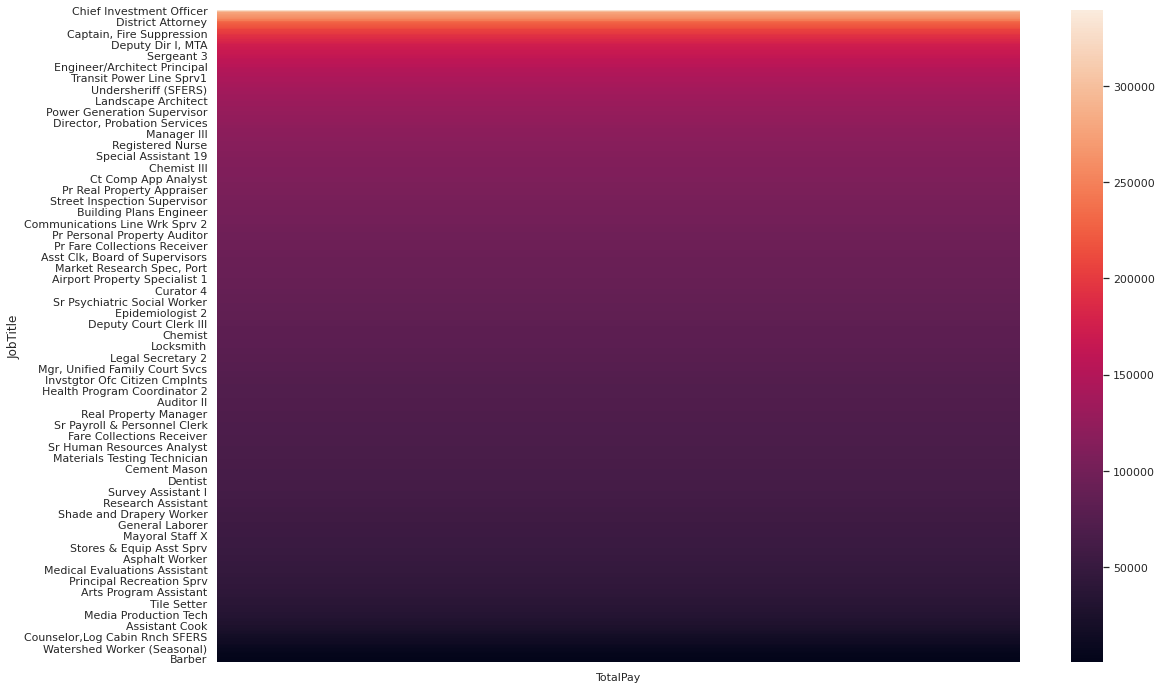

In [228]:
plt.rcParams['figure.figsize'] = 18,12
g = sns.heatmap(p[['TotalPay']])

## Calculate the median value for each job type

In [17]:
df2 = df[['JobTitle', 'TotalPay']]
df2 = df2.groupby('JobTitle').median()
df2 = df2.sort_values('TotalPay', ascending=False)
df2


,TotalPay
JobTitle,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275
Chief Investment Officer,339653.700
Chief of Police,326716.760
"Chief, Fire Department",326233.440
DEPUTY DIRECTOR OF INVESTMENTS,307899.460
...,...
Public Safety Comm Tech,0.000
"Commissioner 16.700c, No Pay",0.000
IS Technician Assistant,0.000


## Looking into the distribution of total pay from 2011 to 2014

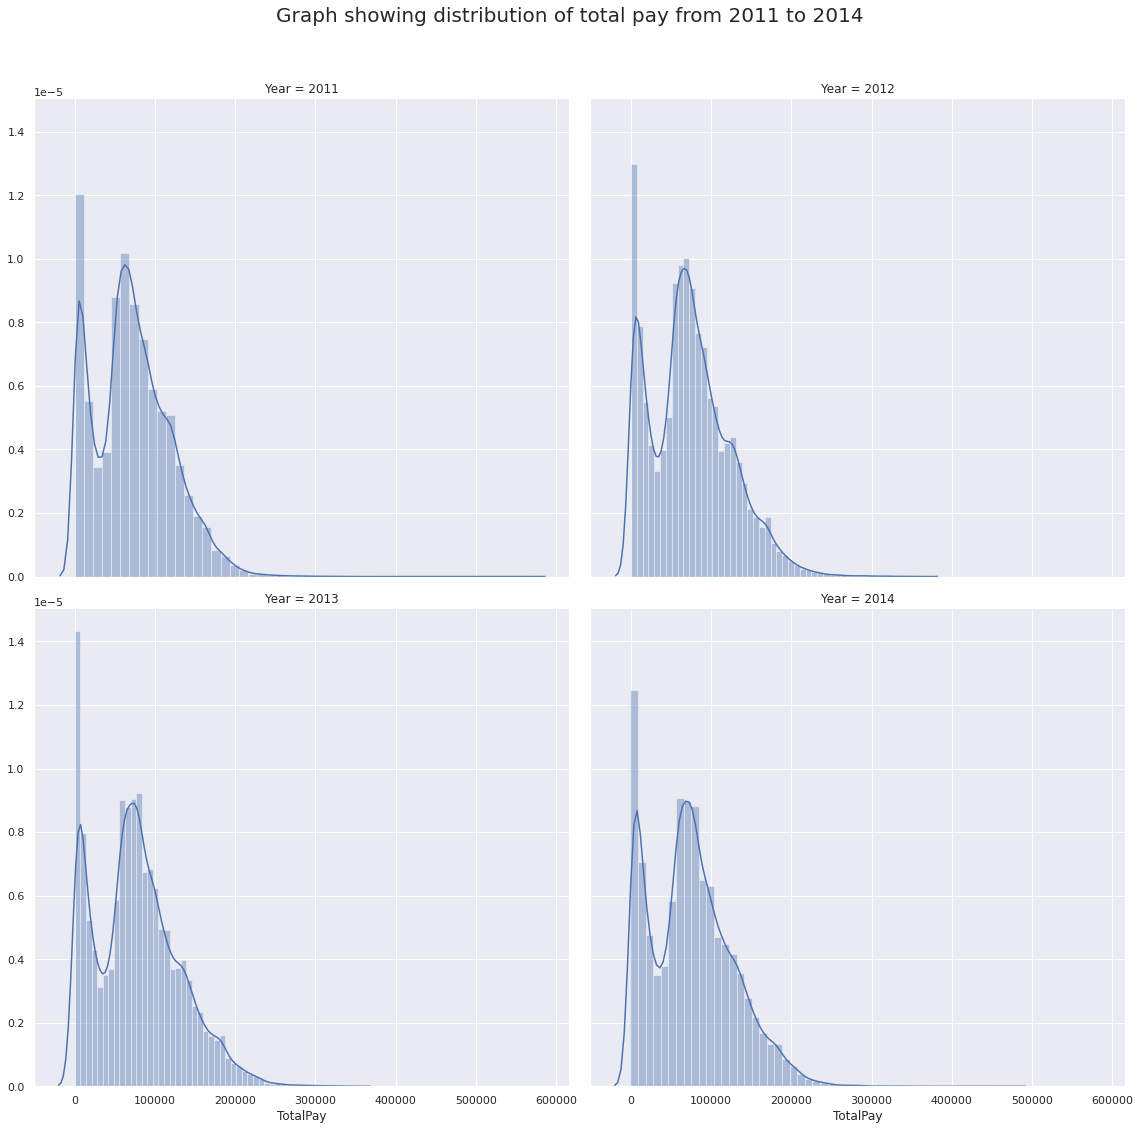

In [18]:
g = sns.FacetGrid(df, col="Year", col_wrap=2, height=8)
g.map(sns.distplot, 'TotalPay')
g.fig.suptitle('Graph showing distribution of total pay from 2011 to 2014', fontsize = 20)
g.fig.subplots_adjust(top= 0.9)

In [19]:
p = df.groupby('Year').mean()
p[['TotalPay']]

,TotalPay
Year,
2011,71743.819645
2012,74112.234931
2013,77611.443142
2014,75471.836912


### Analysis
* The average pay is between 70 thousand to 80 thousand dollars.
* 2012 & 2013 have high number of unemployed people.


## Total pay distribution in part time and full time jobs using kdeplot


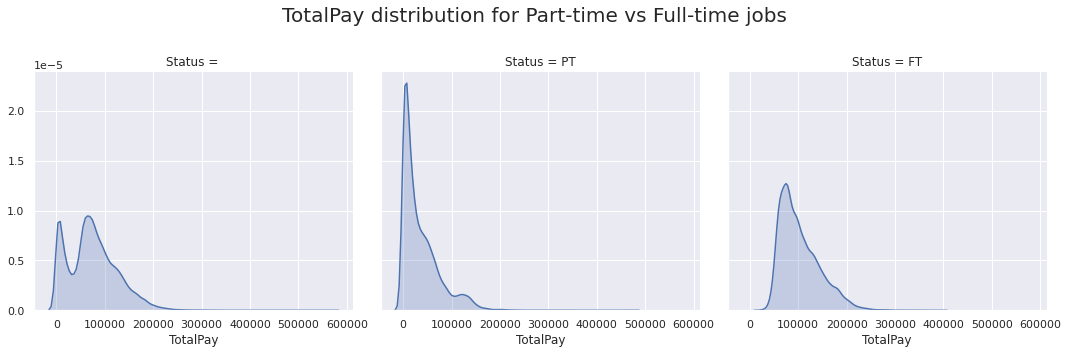

In [20]:
g = sns.FacetGrid(df, col='Status', height=5, col_wrap=3)
g.map(sns.kdeplot, 'TotalPay', shade=True)
g.fig.suptitle("TotalPay distribution for Part-time vs Full-time jobs", fontsize = 20)
g.fig.subplots_adjust(top=0.8)

In [21]:
p = df.groupby('Status').mean()
p[['TotalPay']]

,TotalPay
Status,
,74527.999699
FT,103505.761053
PT,35806.986627


### Analysis
* Full Timers have average of ~ 100 thousand dollars, white Part-timers have 35 thousand dollars.
* Distribution of pay is lower for Part-timers, as it should be, but there are many Part-timers who have TotalPay > 100 thousand dollars.

## OvertimePay distribution between Full time and part time jobs

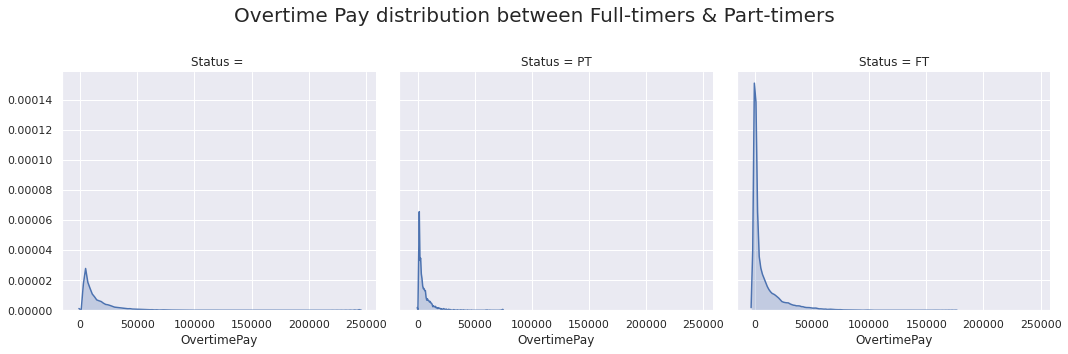

In [22]:
p = sns.FacetGrid(df, col='Status', height=5, col_wrap=3)
p.map(sns.kdeplot, 'OvertimePay', shade=True)
p.fig.suptitle("Overtime Pay distribution between Full-timers & Part-timers", fontsize =20)
p.fig.subplots_adjust(top=0.8)

In [23]:
p = df[['OvertimePay', 'Status']]
p = p.groupby('Status').mean()
p

,OvertimePay
Status,
,4949.882698
FT,8240.775871
PT,1385.436235


### Analysis
* Full-timers receive more amount of OvertimePay


## Distribution of Benefits between part time and full time job

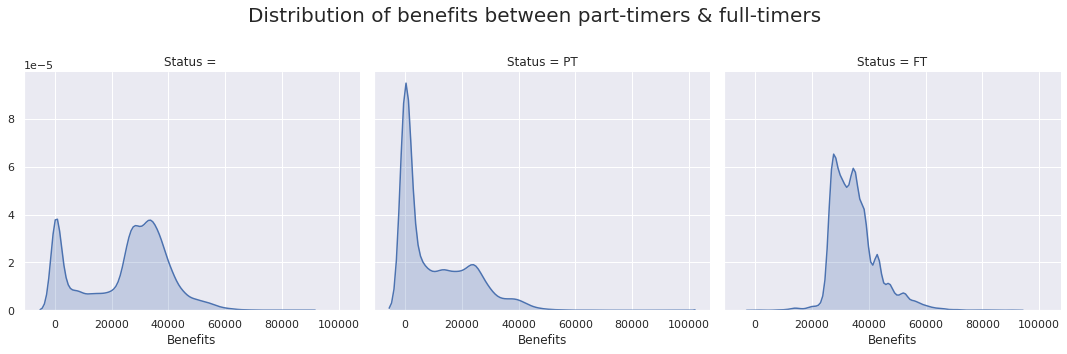

In [24]:
p = sns.FacetGrid(df, col='Status', height = 5, col_wrap=3)
p.map(sns.kdeplot, 'Benefits', shade= True)
p.fig.suptitle("Distribution of benefits between part-timers & full-timers", fontsize = 20)
p.fig.subplots_adjust(top=0.8)

In [25]:
p = df[['Benefits', 'Status']]
p = p.groupby('Status').mean()
p

,Benefits
Status,
,25119.603808
FT,35022.651762
PT,10310.986689


### Analysis
* Full-timers receive almost half of their salary as benefits, while Part-timers get around 10 thousand dollars.


#### Analysis of Part-timers & Full-timers
* Large number of Employees are neither labelled as `PT(Part-timer)` or `FT(Full-timer)`
* Based on selected amount of data, Full-timers receive good amount of OvertimePay & Benefits.

## Now let's have a look into pay distribution among genders

In [27]:
# Importing data
from google.colab import files 
uploaded = files.upload()

Saving gender.csv to gender (1).csv


In [64]:
# Assign the data into a variable gender_data
gender_data = pd.read_csv('gender.csv')
gender_data.head(10)

,id,name,gender
0,4,A YING,Unisex
1,16,AA,Female
2,28,AABAN,Male
3,40,AABHA,Unisex
4,52,AABHEER,Male
5,64,AABHER,Male
6,76,AACHT,Unisex
7,88,AACHTE,Male
8,100,AACHTJE,Female
9,112,AAD,Male


- We do see that the names are all in CAPS. We will need to do the same for our SQLite data. This can be done using the .str.upper() method. We will then use .split() to get the first name from EmployeeName. 

In [69]:
# Split employeename and capitalise it. Then assign it to a new column call 'name'.
df = df.assign(name=df['EmployeeName'].apply(lambda x: x.split()[0].upper()))
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,...,Year,Notes,Agency,Status,name
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,...,2011,,San Francisco,,NATHANIEL
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,...,2011,,San Francisco,,GARY
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,...,2011,,San Francisco,,ALBERT
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,...,2011,,San Francisco,,CHRISTOPHER
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,...,2011,,San Francisco,,PATRICK


In [130]:
# Loading 'gender.csv' into new data
final_df = pd.merge(gender_data, df, how="inner", on="name")

final_df.sort_values("name").head()


,id,name,gender,Id,EmployeeName,...,TotalPayBenefits,Year,Notes,Agency,Status
0,1492,AALIYAH,Female,71328,Aaliyah Hogue,...,2706.32,2012,,San Francisco,
1,1492,AALIYAH,Female,100915,Aaliyah V Hogue,...,51131.48,2013,,San Francisco,
2,1492,AALIYAH,Female,141683,Aaliyah V Hogue,...,21071.20,2014,,San Francisco,PT
3,1492,AALIYAH,Female,146943,Aaliyah Javae'Mercedes O'Neal,...,2622.32,2014,,San Francisco,PT
4,2404,AARAN,Male,50915,Aaran Luo,...,114658.60,2012,,San Francisco,


## Look into the distribution of gender in the dataset using countplot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


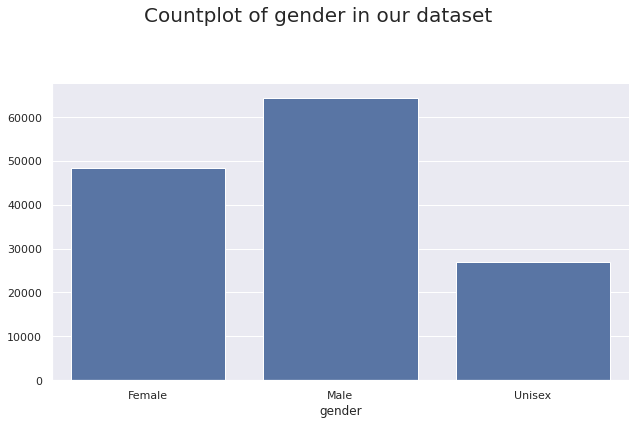

In [148]:
p = sns.FacetGrid(final_df, height=6, aspect=1.5)
p.map(sns.countplot, 'gender')
p.fig.suptitle("Countplot of gender in our dataset", fontsize=20)
p.fig.subplots_adjust(top=0.8)


- Majority of the employees are 'Male', while the 'Unisex' also have a high count.

## Comparing totalpay among sex using a boxplot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


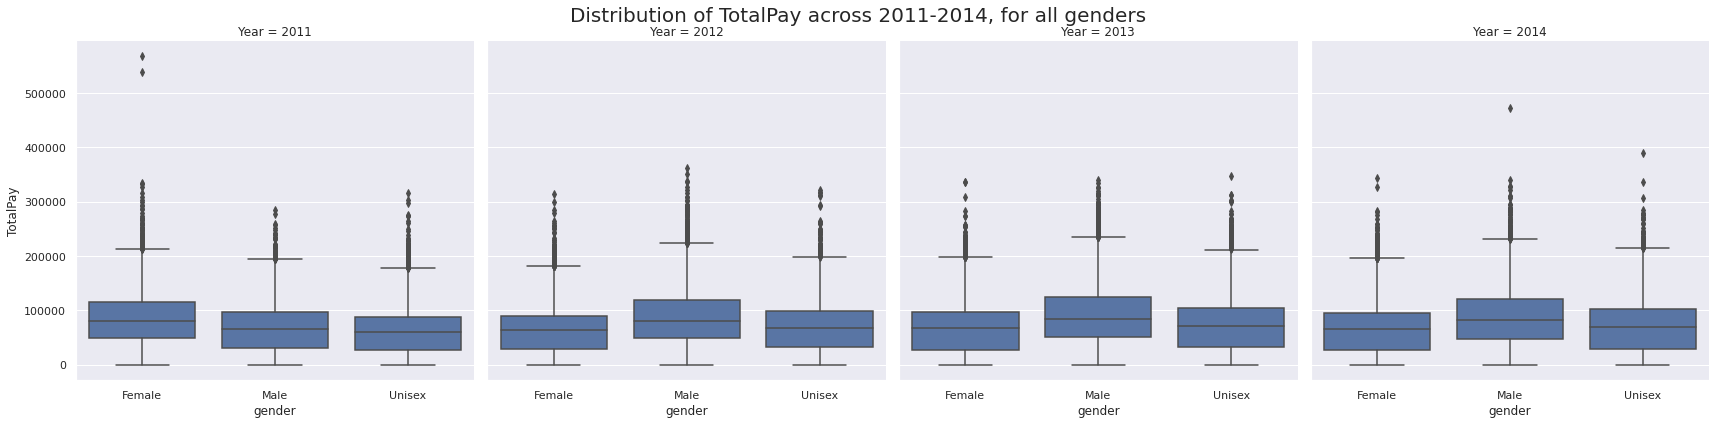

In [195]:
p = sns.FacetGrid(final_df, col='Year', height=6)
p.map(sns.boxplot, 'gender', 'TotalPay')
p.fig.suptitle("Distribution of TotalPay across 2011-2014, for all genders", fontsize=20)
p.fig.subplots_adjust(top=0.9)


* For year 2011, average pay for Female is higher than male
* Except 2011, average pay of Male is higher than that of female.

## Comparing benefits among gender

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


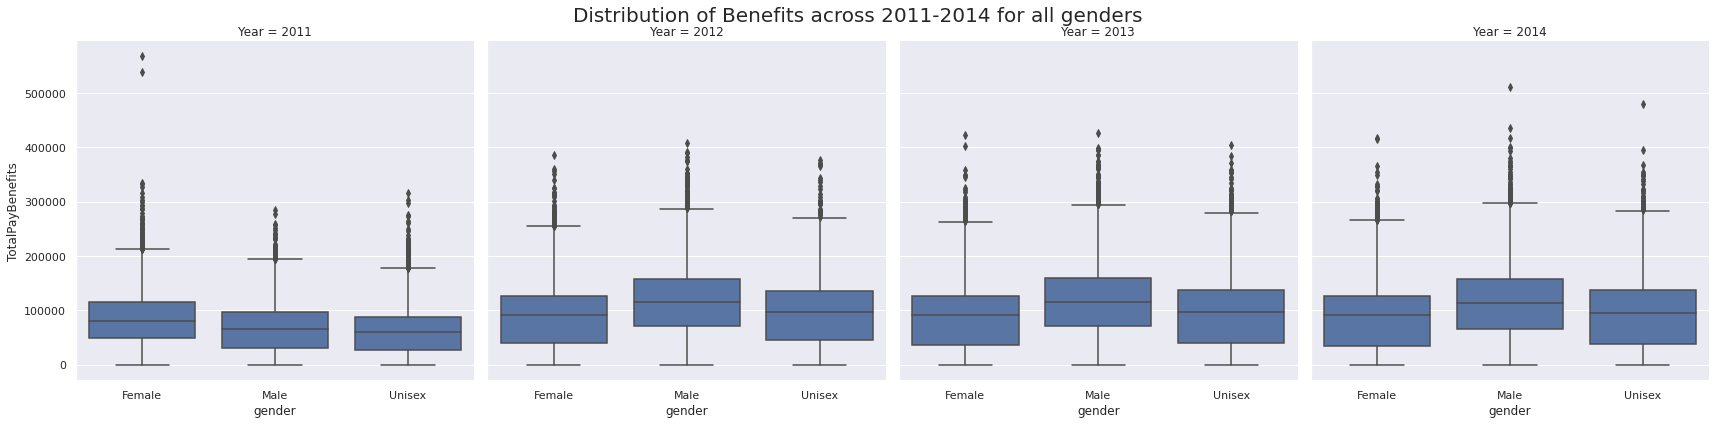

In [199]:
p = sns.FacetGrid(final_df, col='Year', height=6)
p.map(sns.boxplot, 'gender', 'TotalPayBenefits')
p.fig.suptitle("Distribution of Benefits across 2011-2014 for all genders", fontsize=20)
p.fig.subplots_adjust(top=0.9)

- Similar distribution as TotalPay

## Lastly, we will use a scatterplot to show the relationship between basepay and overtimepay among sexes. Use lmplot for this exercise.

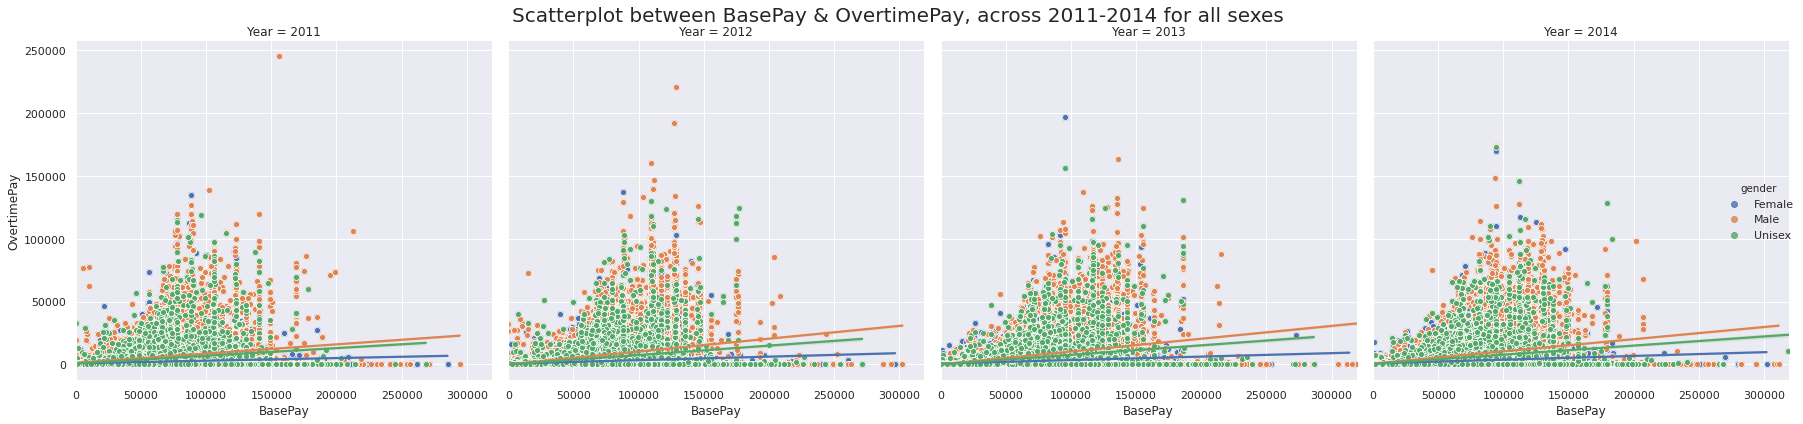

In [212]:
p = sns.lmplot('BasePay', 'OvertimePay', data=final_df, hue='gender', col='Year', height=6)
p.map(sns.scatterplot, 'BasePay','OvertimePay')
p.fig.suptitle("Scatterplot between BasePay & OvertimePay, across 2011-2014 for all sexes", fontsize=20)
p.fig.subplots_adjust(top=0.9)

## Summary
### Data
* The data is of Employees of SF, the fields of interest are:
  * JobTitle
  * BasePay
  * TotalPay
  * TotalPayBenefits
  * OvertimePay

* `gender.csv` contains
  * Name
  * Gender

### Analysis
* Top paying jobs are:

|JobTitle	  |Average TotalPay |
|------|------|
|GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY	| 399211.275000 |
| Chief Investment Officer |	339653.700000 |
| Chief of Police	| 329183.646667| 
| Chief, Fire Department |	325971.683333|
| DEPUTY DIRECTOR OF INVESTMENTS |	307899.460000 |

* Average salaries for males is higher than females, except in 2011 where females were paid higher.
* Benefits such as OvertimePay, BenefitsPay are higher for males.


